In [1]:
%matplotlib inline
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

Un système linéaire et invariant dans le temps (LTI) à une entrée et une sortie peut être décrit mathématiquement par une équation différentielle à coefficient constant liant l'entrée du système et sa sortie. Ainsi, 

$$a_N\frac{d^N y(t)}{dt^N}+\cdots+a_1\frac{d y(t)}{dt}+a_0y(t)=b_N\frac{d^N x(t)}{dt^N}+\cdots+b_1\frac{d x(t)}{dt}+b_0 x(t)$$

où $x(t)$ désigne l'entrée du système et $y(t)$ sa sortie et $N$ correspond à l'ordre du système. Pour analyser ces systèmes, une technique couramment utilisée consiste à passer dans le domaine de Laplace. Notons $X(p)=\mathcal{L}[x(t)]$ et $Y(p)=\mathcal{L}[y(t)]$ les transformées de Laplace de l'entrée et de la sortie. En utilisant le fait que la transformée de Laplace est linéaire et que $\mathcal{L}[\frac{d^k e(t)}{dt^k}]=p^k E(p)$, il est possible de décrire la système par la fonction suivante

$$H(p)\triangleq \frac{Y(p)}{X(p)}=\frac{b_N s^N+b_{N-1}p^{N-1}+\cdots+b_1 p+b_0}{a_N p^N+a_{N-1}p^{N-1}+\cdots+a_1 p+a_0}$$

Cette fonction est appelée **fonction de transfert** du système. D'un point de vue mathématique, à l'exception des systèmes possédant un ordre faible, il est souvent plus pratique d'analyser un système dans le domaine de Laplace plutôt que dans le domaine temporel.

Le langage Python permet de créer des fonctions de transfert via la classe `lti` du module `signal` de Scipy. Cette classe prend deux tableaux en entrée: un tableau contenant les coefficients du numérateur et un tableau contenant les coefficients du dénominateur. 

Pour illustrer ce tutorial, nous allons analyser la fonction de transfert suivante

$$H_1(p)=\frac{2p+1}{p^2+0.5p+1}$$

Pour créer cette fonction de transfert en Python, nous allons utiliser les instructions suivantes:

In [2]:
b = [2,1]       # numerateur
a = [1,0.5,1]     # denominateur

H_1 = sig.lti(b,a)
print(H_1)

TransferFunctionContinuous(
array([2., 1.]),
array([1. , 0.5, 1. ]),
dt: None
)


La classe lti permet de génerer un objet de type TransferFunctionContinuous. Ces objets posssèdent plusieurs méthodes permettant d'analyser simplement le comportement des systèmes continus.

<a id='pole'></a>
## Pôles et des zéros

Une fonction de transfert peut se réexprimer sous la forme factorisée suivante:

$$H(p)=k\frac{(p-z_N)\cdots (p-z_0)}{(p-p_N)\cdots (p-p_0)}$$

* $k$ désigne un gain.
* $z_k$ correspondent aux valeurs de $s$ annulant le numérateur c-a-d $H(z_k)=0$. Ces coefficients sont appelés les **zéros** de la fonction de transfert.
* $p_k$ correspondent aux valeurs de $s$ annulant le denominateur et pour lesquelles $H(p_k)\pm \infty$. Ces coefficients sont appelés les **pôles** de la fonction de transfert.

En Python, il est possible d'accéder aux pôles et aux zéros d'une fonction de transfert via les attributs `poles` et `zeros` de notre objet `TransferFunctionContinuous`.

In [3]:
poles = H_1.poles
zeros = H_1.zeros
print("Zéros {}".format(H_1.zeros))
print("Poles {}".format(H_1.poles))

Zéros [-0.5]
Poles [-0.25+0.96824584j -0.25-0.96824584j]


Pour avoir une représentation plus synthétique de l'emplacement des pôles et des zéros, il est courant d'utiliser une représentation complexe. Par convention, les pôles sont indiqués par des croix et les zéros par des cercles. En Python, cette représentation s'obtient en utilisant le module pyplot de matplotlib et en ayant recours aux attributes `real` et `imag` de nos nombres complexes.

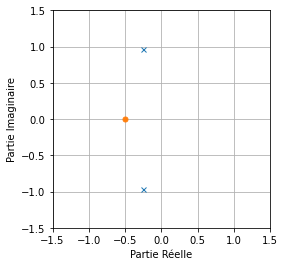

In [4]:
# Affichage des poles
plt.plot(poles.real, poles.imag, 'x', markersize=5)
    
# Affichage des zeros
plt.plot(zeros.real, zeros.imag,  'o', markersize=5) 

# Calibration des axes (limites, normalisation, ...)
plt.axis('scaled')
plt.grid()
plt.xlabel("Partie Réelle");
plt.ylabel("Partie Imaginaire");
plt.axis([-1.5, 1.5, -1.5, 1.5]);

<a id='rt'></a>
## Réponse temporelle

Pour analyser le comportement d'un système, une technique couramment utilisée consiste à envoyer à l'entrée des signaux tests. Deux signaux sont particulièrement utilisés: l'impulsion et l'échelon. Ces deux signaux sont représentés ci-dessous.

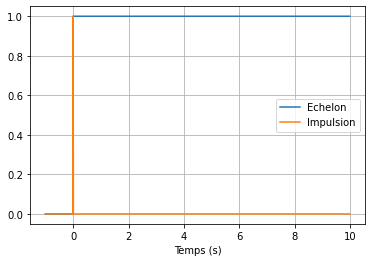

In [5]:
t = np.arange(-1,10,0.01)
impulsion = np.abs(t)<0.0001 #hack to test int and float
echelon = (t>=0)

plt.plot(t,echelon,label="Echelon")
plt.plot(t,impulsion,label="Impulsion")
plt.grid()
plt.xlabel("Temps (s)")
plt.legend();

Nous utiliserons alors la terminologie suivante:

* La **réponse impulsionnelle** correspond à la réponse du système lorsque l'entrée est une impulsion
* La **réponse indicielle** correspond à la réponse du système lorsque l'entrée est un échelon.

En Python, les réponses impulsionnelles et indicielles s'obtiennent en appelant les méthodes `impulse` et `step` de notre objet `TransferFunctionContinuous`. Ces méthodes retournent deux arguments: la base temps (en s) ainsi que le signal de sortie.

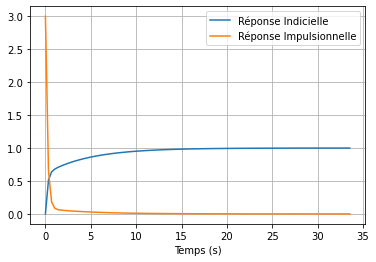

In [12]:

[t_imp, r_imp] = H_1.impulse()
[t_ind, r_ind] = H_1.step()

plt.plot(t_ind,r_ind,label="Réponse Indicielle")
plt.plot(t_imp,r_imp,label="Réponse Impulsionnelle")
plt.grid()
plt.xlabel("Temps (s)")
plt.legend();

Il est également possible d'obtenir la réponse du système à une entrée quelconque en appelant la méthode `output`. Cette méthode prend deux arguments en entrée: le signal d'entrée et la base temps. Le programme suivant montre comment obtenir la réponse du système lorsqu'une sinusoide de fréquence 0.15Hz est envoyée en entrée.

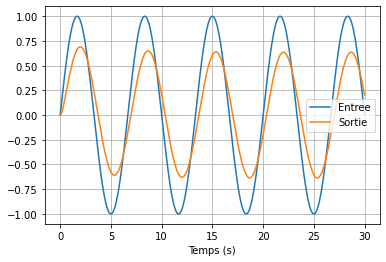

In [13]:
t_e = np.arange(0,30,0.01)      # base temporelle (de 0 à 1s par pas de 0.01s)
entree = np.sin(2*np.pi*0.15*t_e) # sinusoide à 0.15Hz
[t_s, sortie, xout] = H_1.output(entree,t_e)

plt.plot(t_e, entree, label="Entree")
plt.plot(t_s, sortie,label="Sortie")
plt.grid()
plt.xlabel("Temps (s)")
plt.legend();

Remarquons que lorsque nous envoyons une sinusoide de fréquence $f_0$ à l'entrée d'un système linéaire et invariant dans le temps, la sortie en régime permanent est une sinusoide de même fréquence possédant une amplitude et une phase potentiellement différentes de celles de l'entrée.

<a id='rf'></a>
## Réponse Fréquentielle

Compte tenu de la remarque précédente, il est interessant de comprendre comment un système va affecter l'amplitude et la phase d'une sinusoîde de fréquence $f_0$ envoyée en entrée. Pour analyser ces deux paramètres, la technique la plus utilisée consiste à évaluer la réponse fréquentielle du système. Cette réponse fréquentielle s'obtient en évaluant la fonction de transfert en $p=j\omega$ c-a-d

$$H(j\omega)=\left.H(p)\right|_{p=j\omega}$$

où $\omega$ correspond à la pulsation en rad/s. Le gain et le dephasage apportés par le système à la pulsation $\omega_0$ s'obtiennent ensuite simplement en évaluant:

* le module $|H(j\omega)|$ de la réponse fréquentielle,
* l'argument $\arg [H(j\omega)]$ de la réponse fréquentielle.

En Python, la réponse fréquentielle s'obtient en utilisant la méthode `freqresp` de notre objet `TransferFunctionContinuous`. Cette fonction retourne deux arguments: la base des pulsations (en rad/s) et la réponse fréquentielle (tableau numpy complexe). Une fois la réponse fréquentielle déterminée, le calcul du module et de l'argument s'obtient en utilisant respectivement les fonctions `abs` et `angle` de Numpy.

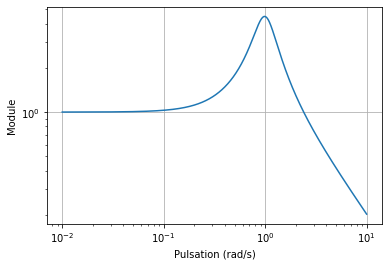

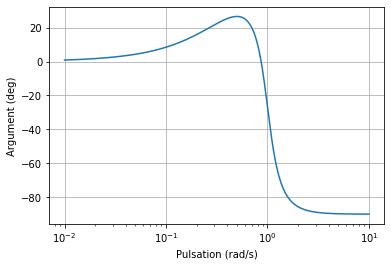

In [8]:
[w, r_w] = H_1.freqresp()
module = np.abs(r_w)
argument = 180*np.angle(r_w)/np.pi

plt.loglog(w,module)
plt.grid()
plt.ylabel("Module")
plt.xlabel("Pulsation (rad/s)");

plt.figure()
plt.semilogx(w,argument)
plt.grid()
plt.ylabel("Argument (deg)")
plt.xlabel("Pulsation (rad/s)");

Dans un contexte de filtrage, il est souvent souhaitable d'obtenir une phase linéaire. Pour évaluer la linéarité de la phase, une technique couramment utilisée consiste à évaluer le retard de groupe:

$$\tau = -\frac{d \arg [H(j\omega)]}{d\omega}$$

Ce retard de groupe s'exprime en seconde. ENumériquement, il est possible d'approximer ce retard en approchant la dérivée par une différence finie.

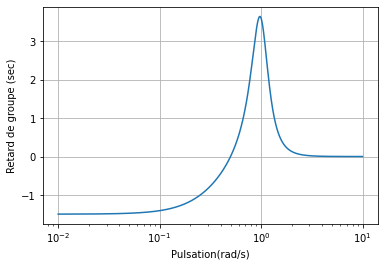

In [9]:
tau = -np.diff(np.unwrap(np.angle(r_w)))/np.diff(w)

plt.semilogx(w[1:],tau)
plt.grid()
plt.ylabel("Retard de groupe (sec)")
plt.xlabel("Pulsation(rad/s)");